# Fractal set generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.table import Table

In [2]:
p = np.array([0.05, 0.2, 0.45, 0.3])
d = np.log10(np.sum(p * p)) / np.log10(0.5)
print(f"Fractal dimension {d:.2f}")

Fractal dimension 1.58


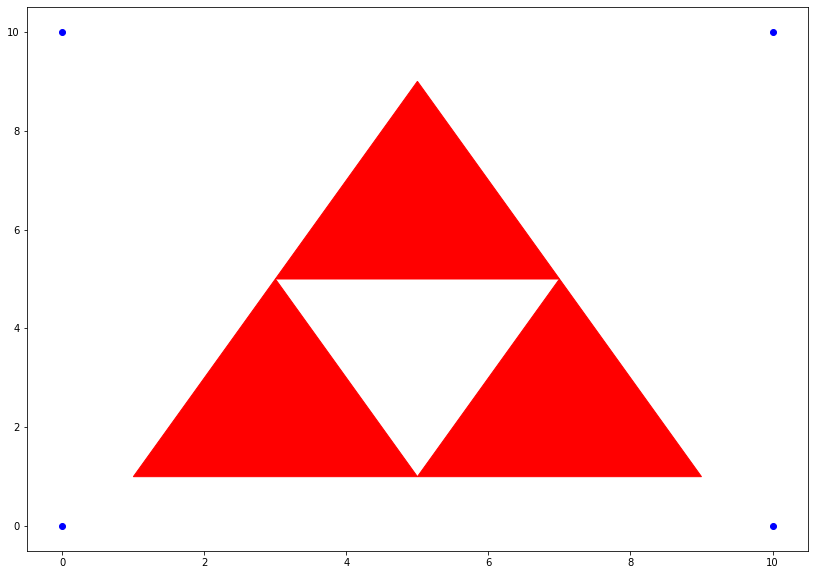

In [3]:
import numpy as np
import matplotlib.pyplot as plt

MAX_LEVEL = 1


def sierpinski(p1, p2, p3, level=0):
    if level >= MAX_LEVEL:
        yield plt.Polygon([p1, p2, p3], color='red')
        return

    yield from sierpinski(p1, (p1+p2) / 2, (p1+p3) / 2, level+1)
    yield from sierpinski((p1+p2) / 2, p2, (p2+p3) / 2, level+1)
    yield from sierpinski((p1+p3) / 2, (p2+p3) / 2, p3, level+1)


plt.figure(figsize=(14, 10))
plt.scatter([0, 0, 10, 10], [0, 10, 0, 10], color='blue')

for patch in sierpinski(
        np.array([1.0, 1.0]), np.array([9.0, 1.0]), np.array([5.0, 9.0])):
    plt.gca().add_patch(patch)

plt.show()

1.56
False


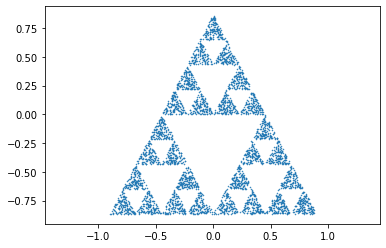

In [4]:
from dataclasses import dataclass

@dataclass
class Triangle:
    x1: float
    y1: float
    x2: float
    y2: float
    x3: float
    y3: float
        
    def area(self):
        return 0.5 * abs(self.x1 * (self.y2 - self.y3) + self.x2 * (self.y3 - self.y1) + self.x3 * (self.y1 - self.y2))
    
    def check_p(self, x, y):
        t1 = Triangle(x, y, self.x2, self.y2, self.x3, self.y3)
        t2 = Triangle(self.x1, self.y1, x, y, self.x3, self.y3)
        t3 = Triangle(self.x1, self.y1, self.x2, self.y2, x, y)
        A = self.area()
        A1 = t1.area()
        A2 = t2.area()
        A3 = t3.area()
        return abs(A - (A1 + A2 + A3)) < 1e-6

sqrt3h = 0.5 * np.sqrt(3)
t = Triangle(-0.9, -sqrt3h, 0.9, -sqrt3h, 0.0, sqrt3h)
print(f'{t.area():.2f}')
print(f'{t.check_p(1, 2)}')

triangle_list = [t]

def sierpinski(triangle_list):
    new_list = []
    for t in triangle_list:
        dx12 = t.x1 + 0.5 * (t.x2 - t.x1)
        dy12 = t.y1 + 0.5 * (t.y2 - t.y1)
        dx23 = t.x2 + 0.5 * (t.x3 - t.x2)
        dy23 = t.y2 + 0.5 * (t.y3 - t.y2)
        dx31 = t.x3 + 0.5 * (t.x1 - t.x3)
        dy31 = t.y3 + 0.5 * (t.y1 - t.y3)
        t1 = Triangle(t.x1, t.y1, dx12, dy12, dx31, dy31)
        t2 = Triangle(t.x2, t.y2, dx12, dy12, dx23, dy23)
        t3 = Triangle(t.x3, t.y3, dx31, dy31, dx23, dy23)
        new_list.append(t1)
        new_list.append(t2)
        new_list.append(t3)
    return new_list


N = 20000
D = 2
data = np.random.rand(D * N).reshape(N, D) * (0.9 + 0.9) - 0.9
selected = data

n = 4
for i in range(n):
    new = []
    for point in selected:
        for t in triangle_list:
            if t.check_p(point[0], point[1]):
                new.append(point)
    selected = np.array(new)
    triangle_list = sierpinski(triangle_list)

plt.figure()
plt.scatter(selected[:, 0], selected[:, 1], s=1, marker='.')
plt.axis('equal')
plt.show()

772246


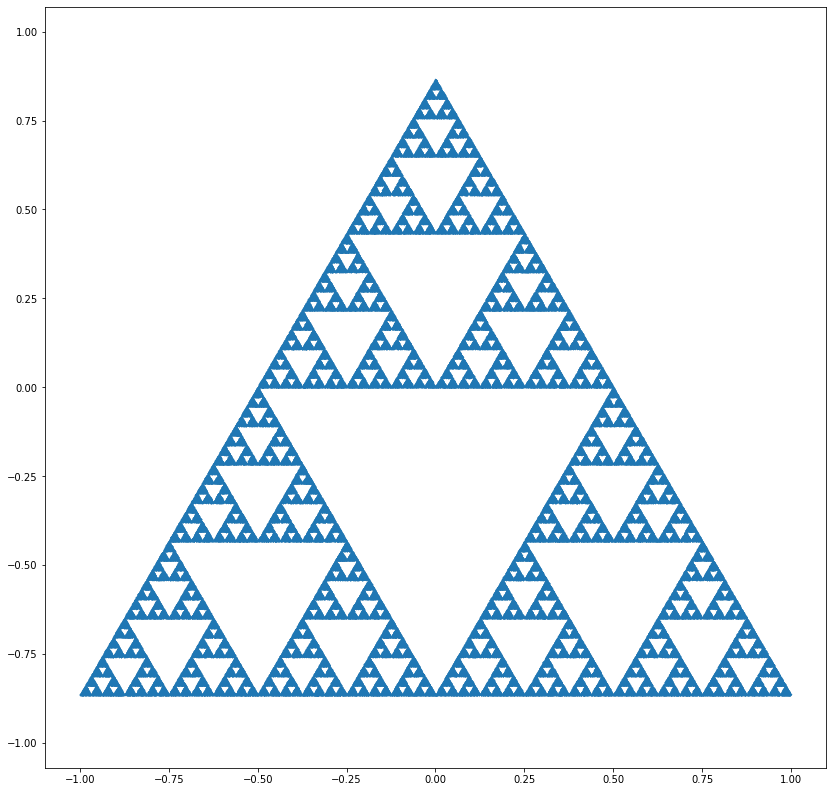

In [9]:
fname = '..\data\sierpinski\points_5000000.csv'
selected = np.loadtxt(fname)

print(selected.size)

plt.figure(figsize=(14, 14))
plt.scatter(selected[:, 0], selected[:, 1], s=1, marker='.')
plt.axis('equal')
plt.show()

======= Scale : 1.0
======= Scale : 0.7506471911731676
======= Scale : 0.563471205616166
======= Scale : 0.42296807780273343
======= Scale : 0.31749979955853563
======= Scale : 0.2383303327366585
======= Scale : 0.17890199484013916
======= Scale : 0.13429227992202697
======= Scale : 0.10080612271971032
======= Scale : 0.0756698328726082
======= Scale : 0.05680134750236635
======= Scale : 0.042637771957502325
======= Scale : 0.032005923757781184
======= Scale : 0.024025156769680988
======= Scale : 0.01803441644665605
======= Scale : 0.013537484050129538
======= Scale : 0.010161874377781297
======= Scale : 0.007627982458736108
======= Scale : 0.005725923606968456
======= Scale : 0.004298148472443003
======= Scale : 0.00322639307808458
======= Scale : 0.0024218829016847423
======= Scale : 0.001817979597499972
======= Scale : 0.0013646612784734792
======= Scale : 0.0010243791555889017
======= Scale : 0.0007689473358391502
======= Scale : 0.0005772081578077483
======= Scale : 0.000433279682

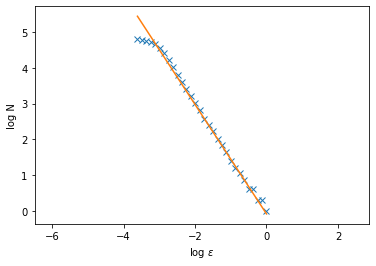

In [10]:
def fractal_eval(points, L):
    Lx = L
    Ly = L
    
    start = np.log10(L / 2**(1))
    end = np.log10(L / 2**13)

    scales=np.logspace(start, end, 30)
    Ns=[]
    # looping over several scales
    for scale in scales:
        print ("======= Scale :",scale)
        # computing the histogram
        H, edges=np.histogramdd(points, bins=(np.arange(0,Lx+scale/2,scale),np.arange(0,Ly+scale/2,scale)))
        Ns.append(np.sum(H>0))

    # linear fit, polynomial of degree 1
    coeffs=np.polyfit(np.log10(scales[3:14]), np.log10(Ns[3:14]), 1)
    
    print(coeffs)

    plt.plot(np.log10(scales), np.log10(Ns), 'x')
    plt.plot(np.log10(scales), np.polyval(coeffs, np.log10(scales)))
    plt.xlabel('log $\epsilon$')
    plt.ylabel('log N')
    plt.axis("equal")

    print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient

    plt.show()
    
fractal_eval(selected, 2)